# KdV Equation

### References
Shahrill, M., Chong, M.S.F & Nor, H.N.H.M.: Applying Explicit Schemes to the Korteweg-de Vries Equation, _Modern Appl. Sci._ 9(2015) 200-224.  
http://ccsenet.org/journal/index.php/mas/article/view/46132

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def conv(u, w):
    """
    u, w: 1D-array
    """
    w = np.asarray(w)
    m = w.size // 2
    up = np.pad(u, (w.size-m-1, m), 'wrap')
    return np.convolve(up, w, 'valid')

def nearest(ts, t_print=[0, 0.1, 0.2]):
    ts = np.asarray(ts)
    idx = [np.abs(ts-t).argmin() for t in t_print]
    return ts[idx]

cmap = plt.get_cmap("cool")

CPU times: user 24.5 s, sys: 165 ms, total: 24.6 s
Wall time: 25.1 s


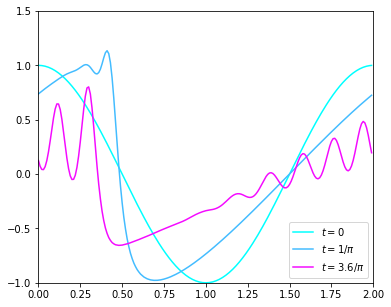

In [3]:
%%time
# First Order Upwind Scheme (paper)

x_num = 200
x, dx = np.linspace(0, 2, x_num, endpoint=False, retstep=True)
u = np.cos(np.pi*x)
plt.figure(figsize=(6, 5))
plt.plot(x, u, c=cmap(0.))

dt = 0.00001
ts = np.arange(dt, 1.2, dt)
t_print = nearest(ts, [1/np.pi, 3.6/np.pi])
delta = 0.022

def diff(u, dx=1.):
    return 1/dx * conv(u, [1, -1])

def diff3(u, dx=1.):
    return 1/(2*dx*dx*dx) * conv(u, [1, -2, 0, 2, -1])

for t in ts:
    uplus = conv(u, [1, 0])
    h = np.where(u+uplus > 0, u, uplus)
    u -= dt / dx * u * conv(h, [0, 1, -1]) + dt * delta * delta * diff3(u, dx)
    if t in t_print:    
        plt.plot(x, u, c=cmap(t/ts[-1]))

plt.xlim([0, 2])
plt.ylim([-1, 1.5])
plt.legend(["$t=0$", "$t=1/\pi$", "$t=3.6/\pi$"])

stability=0.200 (<0.385)
CPU times: user 19min 12s, sys: 4.9 s, total: 19min 17s
Wall time: 19min 28s


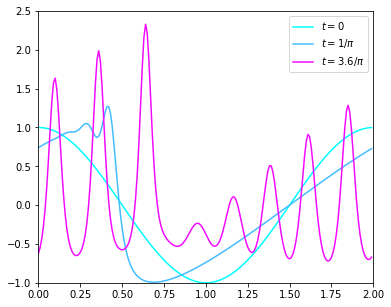

In [34]:
%%time
# Zabusky and Kruskal Scheme (paper)

dt = 0.0000002
ts = np.arange(dt, 1.2, dt)
t_print = nearest(ts, [1/np.pi, 3.6/np.pi])
delta = 0.022

def avg(u, w=np.ones(3)/3):
    return conv(u, w)

def diff(u, dx=1.):
    return 1/(2*dx) * conv(u, [1, 0, -1])

def diff3(u, dx=1.):
    return 1/(2*dx*dx*dx) * conv(u, [1, -2, 0, 2, -1])

x_num = 200
x, dx = np.linspace(0, 2, x_num, endpoint=False, retstep=True)
u = np.cos(np.pi*x)
ub = u - dt * avg(u) * diff(u, dx) - dt * delta * delta * diff3(u, dx)
plt.figure(figsize=(6, 5))
plt.plot(x, u, c=cmap(0.))

stability = dt/dx*np.abs(-2+1/dx/dx)
print("stability={:.3f} (<0.385)".format(stability))
#assert stability < 2/(3*np.sqrt(3)), "too large dt"

for t in ts:
    u, ub = (ub, u)
    ub -= 2*dt * avg(u) * diff(u, dx) + 2*dt * delta * delta * diff3(u, dx)
    if t in t_print:    
        plt.plot(x, ub, c=cmap(t/ts[-1]))

plt.xlim([0, 2])
plt.ylim([-1, 2.5])
plt.legend(["$t=0$", "$t=1/\pi$", "$t=3.6/\pi$"])

CPU times: user 51.4 s, sys: 722 ms, total: 52.1 s
Wall time: 54.1 s


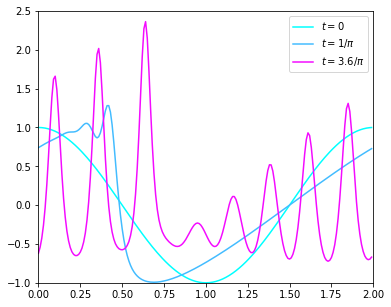

In [44]:
%%time
# Lax-Wendroff Scheme (paper)

dt = 0.000005
ts = np.arange(dt, 1.2, dt)
t_print = nearest(ts, [1/np.pi, 3.6/np.pi])
delta = 0.022

def diff(u, dx=1.):
    return 1/(2*dx) * conv(u, [1, 0, -1])

def diff3(u, dx=1.):
    return 1/(2*dx*dx*dx) * conv(u, [1, -2, 0, 2, -1])

x_num = 200
x, dx = np.linspace(0, 2, x_num, endpoint=False, retstep=True)
u = np.cos(np.pi*x)
plt.figure(figsize=(6, 5))
plt.plot(x, u, c=cmap(0.))

for t in ts:
    u -= dt * u * (diff(u, dx) - dt/(4*dx*dx) * conv(u*u, [1, -2, 1])) + dt * delta * delta * diff3(u, dx)
    if t in t_print:
        plt.plot(x, u, c=cmap(t/ts[-1]))

plt.xlim([0, 2])
plt.ylim([-1, 2.5])
plt.legend(["$t=0$", "$t=1/\pi$", "$t=3.6/\pi$"])

CPU times: user 17.5 s, sys: 296 ms, total: 17.8 s
Wall time: 19.4 s


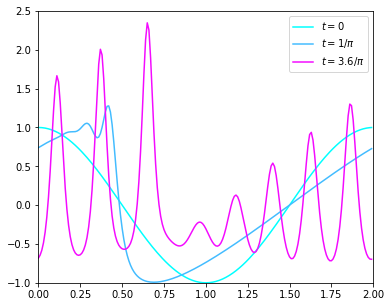

In [45]:
%%time
# Walkley Scheme (paper)

dt = 0.00001
ts = np.arange(dt, 1.2, dt)
t_print = nearest(ts, [1/np.pi, 3.6/np.pi])
delta = 0.022

def diff3(u, dx=1.):
    return 1/(2*dx*dx*dx) * conv(u, [1, -2, 0, 2, -1])

x_num = 200
x, dx = np.linspace(0, 2, x_num, endpoint=False, retstep=True)
u = np.cos(np.pi*x)
plt.figure(figsize=(6, 5))
plt.plot(x, u, c=cmap(0.))

for t in ts:
    u -= dt/(12*dx) * conv(u*u, [-1/2, 4, 0, -4, 1/2]) + dt * delta * delta * diff3(u, dx)
    if t in t_print:
        plt.plot(x, u, c=cmap(t/ts[-1]))

plt.xlim([0, 2])
plt.ylim([-1, 2.5])
plt.legend(["$t=0$", "$t=1/\pi$", "$t=3.6/\pi$"])

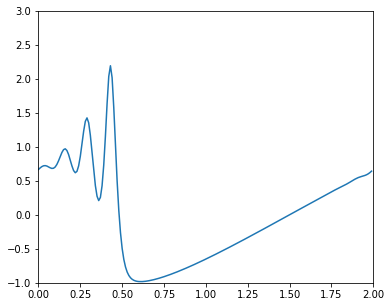

In [25]:
# Animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

dt = 0.000005
x_num = 200

def diff3(u, dx=1.):
    return 1/(2*dx*dx*dx) * conv(u, [1, -2, 0, 2, -1])

class KdV():
    def __init__(self, x_num, dt):
        self.dt = dt
        self.x, self.dx = np.linspace(0, 2, x_num, endpoint=False, retstep=True)
        self.u = np.cos(np.pi*x)
    
    def reset(self):
        self.u = np.cos(np.pi*x)
    
    def loop(self, num_loop=100):
        u = self.u
        dt = self.dt
        dx = self.dx
        delta = 0.022
        for _ in range(num_loop):
            self.u -= dt/(12*dx) * conv(u*u, [-1/2, 4, 0, -4, 1/2]) + dt * delta * delta * diff3(u, dx)
        return self.u
    
    def return_loop(self, num_loop=100):
        u = self.u
        dt = self.dt
        dx = self.dx
        delta = 0.022
        ureturn = self.u.copy()
        for _ in range(num_loop):
            self.u -= dt/(12*dx) * conv(u*u, [-1/2, 4, 0, -4, 1/2]) + dt * delta * delta * diff3(u, dx)
        return ureturn

kdv = KdV(x_num, dt)
fig, ax = plt.subplots(figsize=(6, 5))
im, = ax.plot(kdv.x, kdv.u)
ax.set_xlim([0, 2])
ax.set_ylim([-1, 3])

update = lambda t: im.set_data(kdv.x, kdv.return_loop(4000))
anim = FuncAnimation(fig, update, init_func=kdv.reset(), interval=100, frames=20) #frames=200
HTML(anim.to_jshtml())

In [10]:
#FuncAnimation(fig, update, init_func=kdv.reset(), interval=100, frames=200).save("kdv.gif", writer="imagemagick", fps=10)

In [9]:
#FuncAnimation(fig, update, init_func=kdv.reset(), interval=100, frames=200).save("kdv.mp4", writer="ffmpeg", fps=10)

Text(0,0.5,'10t')

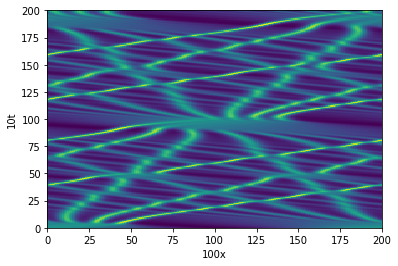

In [27]:
# WARNING: takes long time (nearly 1 hour)
dt = 0.000001
x_num = 200
kdv = KdV(x_num, dt)

t_step = 0.1
ts = np.arange(0, 20, t_step)
loopPerStep = int(t_step/dt)

u_hist = []
for _ in ts:
    u_hist.append(kdv.return_loop(loopPerStep))
    
u_hist = np.asarray(u_hist)
plt.pcolormesh(u_hist)
plt.xlabel("100x")
plt.ylabel("10t")

In [40]:
np.save('kdv_timedependent.npy', u_hist)

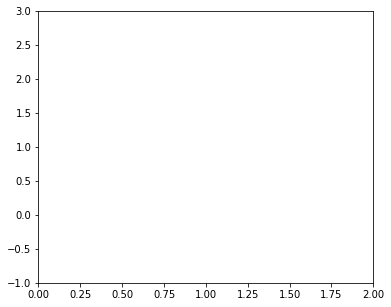

In [49]:
from matplotlib.animation import ArtistAnimation

fig, ax = plt.subplots(figsize=(6, 5))
ax.set_xlim([0, 2])
ax.set_ylim([-1, 3])

artists = []
for u in u_hist:
    artists.append(ax.plot(kdv.x, u, "royalblue"))
anim = ArtistAnimation(fig, artists, interval=100)


In [50]:
anim.save("kdv.gif", writer="imagemagick", fps=10)

In [51]:
anim.save("kdv.mp4", writer="ffmpeg", fps=10)